Image loaded successfully!


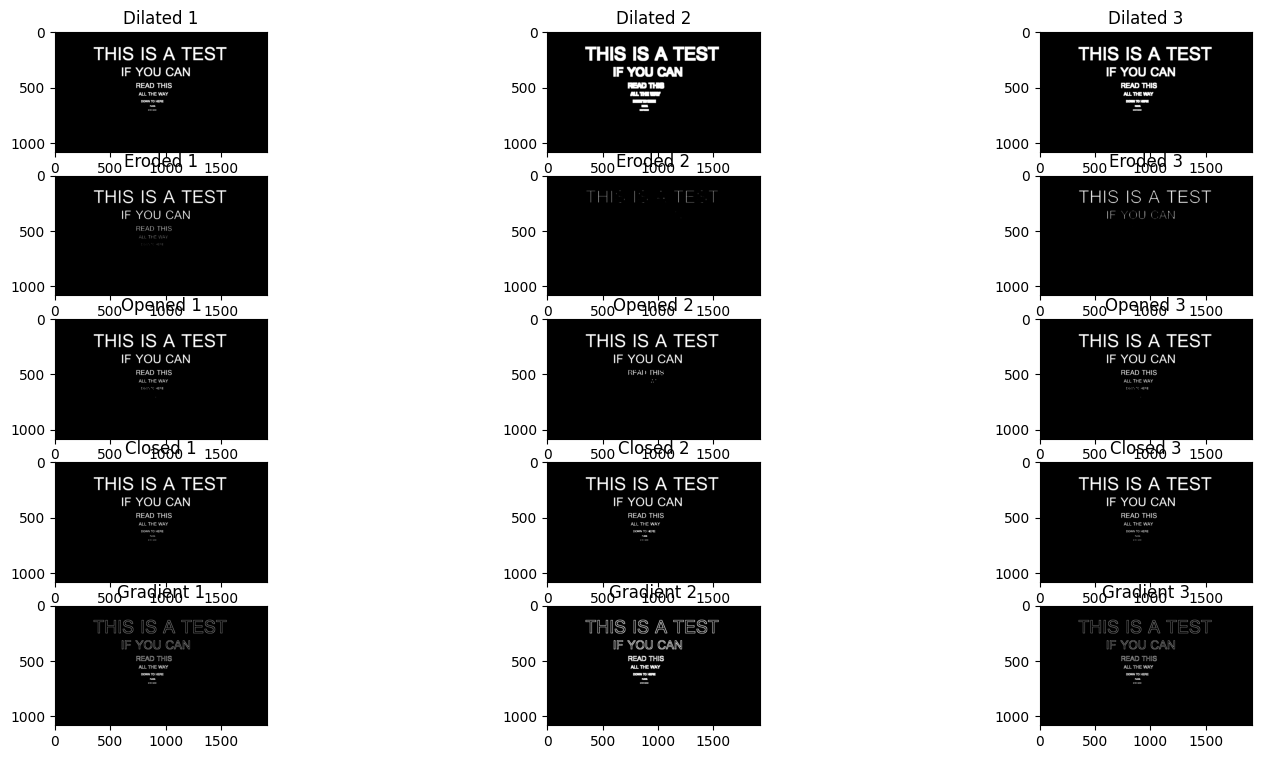

Brain MRI image loaded successfully!


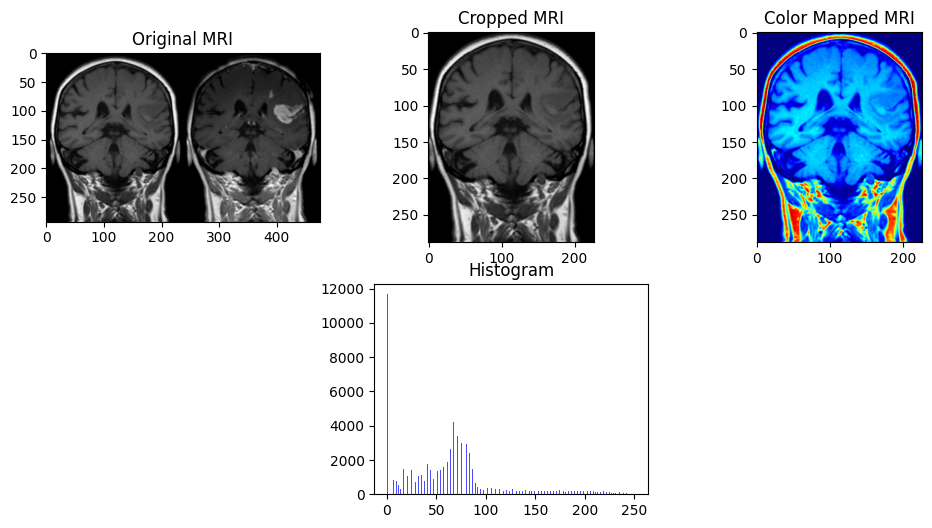

'\n1. Performed morphological operations (Dilation, Erosion, Opening, Closing, Gradient) on an image.\n2. Processed a brain MRI image by applying color mapping and generating a histogram.\n'

In [1]:
# -*- coding: utf-8 -*-
"""
CV06-02-2025.ipynb - Modified for Jupyter Notebook

This script performs morphological operations (dilation, erosion, opening, closing, gradient) 
on an image and applies color mapping to a brain MRI scan.
"""

# Import necessary libraries
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for image display

# Load the grayscale image
image_path = r"C:\Users\ACER\Downloads\quote-typography-minimalism-text-wallpaper.jpg" # Change this to your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if img is None:
    print("Error: Image not found. Check the file path.")
else:
    print("Image loaded successfully!")

    # ----------------- Thresholding -----------------
    _, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # ----------------- Defining Kernels -----------------
    kernel1 = np.ones((3, 3), np.uint8)  # 3x3 kernel
    kernel2 = np.ones((5, 5), np.uint8)  # 5x5 kernel
    kernel3 = np.ones((3, 3), np.uint8)  # 3x3 kernel

    # ----------------- Morphological Operations -----------------

    # 1. Dilation (Expands bright regions)
    dilated_image1 = cv2.dilate(binary_image, kernel1, iterations=1)
    dilated_image2 = cv2.dilate(binary_image, kernel2, iterations=3)
    dilated_image3 = cv2.dilate(binary_image, kernel3, iterations=3)

    # 2. Erosion (Shrinks bright regions)
    eroded_image1 = cv2.erode(binary_image, kernel1, iterations=1)
    eroded_image2 = cv2.erode(binary_image, kernel2, iterations=3)
    eroded_image3 = cv2.erode(binary_image, kernel3, iterations=3)

    # 3. Opening (Removes small white noise)
    opened_image1 = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel1)
    opened_image2 = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel2)
    opened_image3 = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel3)

    # 4. Closing (Fills small black holes)
    closed_image1 = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel1)
    closed_image2 = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel2)
    closed_image3 = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel3)

    # 5. Gradient (Edge detection)
    gradient_image1 = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel1)
    gradient_image2 = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel2)
    gradient_image3 = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel3)

    # ----------------- Display Results -----------------

    plt.figure(figsize=(18, 9))

    # Display dilated images
    plt.subplot(5, 3, 1), plt.imshow(dilated_image1, cmap="gray"), plt.title("Dilated 1")
    plt.subplot(5, 3, 2), plt.imshow(dilated_image2, cmap="gray"), plt.title("Dilated 2")
    plt.subplot(5, 3, 3), plt.imshow(dilated_image3, cmap="gray"), plt.title("Dilated 3")

    # Display eroded images
    plt.subplot(5, 3, 4), plt.imshow(eroded_image1, cmap="gray"), plt.title("Eroded 1")
    plt.subplot(5, 3, 5), plt.imshow(eroded_image2, cmap="gray"), plt.title("Eroded 2")
    plt.subplot(5, 3, 6), plt.imshow(eroded_image3, cmap="gray"), plt.title("Eroded 3")

    # Display opened images
    plt.subplot(5, 3, 7), plt.imshow(opened_image1, cmap="gray"), plt.title("Opened 1")
    plt.subplot(5, 3, 8), plt.imshow(opened_image2, cmap="gray"), plt.title("Opened 2")
    plt.subplot(5, 3, 9), plt.imshow(opened_image3, cmap="gray"), plt.title("Opened 3")

    # Display closed images
    plt.subplot(5, 3, 10), plt.imshow(closed_image1, cmap="gray"), plt.title("Closed 1")
    plt.subplot(5, 3, 11), plt.imshow(closed_image2, cmap="gray"), plt.title("Closed 2")
    plt.subplot(5, 3, 12), plt.imshow(closed_image3, cmap="gray"), plt.title("Closed 3")

    # Display gradient images
    plt.subplot(5, 3, 13), plt.imshow(gradient_image1, cmap="gray"), plt.title("Gradient 1")
    plt.subplot(5, 3, 14), plt.imshow(gradient_image2, cmap="gray"), plt.title("Gradient 2")
    plt.subplot(5, 3, 15), plt.imshow(gradient_image3, cmap="gray"), plt.title("Gradient 3")

    plt.show()

    # ----------------- Brain MRI Processing -----------------

    brain_image_path = r"C:\Users\ACER\Downloads\MRI-contrast-vs-no-contrast.png"  # Change this to your image path
    brain_img = cv2.imread(brain_image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the MRI image is loaded
    if brain_img is None:
        print("Error: Brain MRI image not found. Check the file path.")
    else:
        print("Brain MRI image loaded successfully!")

        # Apply thresholding and find contours
        _, thresh = cv2.threshold(brain_img, 10, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Crop the brain image based on the largest contour
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        cropped_brain_img = brain_img[y:y+h, x:x+w]

        # Apply color mapping to highlight tumor regions
        color_mapped_brain = cv2.applyColorMap(cropped_brain_img, cv2.COLORMAP_JET)

        # ----------------- Display Brain MRI Processing Results -----------------

        plt.figure(figsize=(12, 6))

        plt.subplot(2, 3, 1), plt.imshow(brain_img, cmap="gray"), plt.title("Original MRI")
        plt.subplot(2, 3, 2), plt.imshow(cropped_brain_img, cmap="gray"), plt.title("Cropped MRI")
        plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(color_mapped_brain, cv2.COLOR_BGR2RGB)), plt.title("Color Mapped MRI")
        plt.subplot(2, 3, 5), plt.hist(cropped_brain_img.ravel(), bins=256, color="blue", alpha=0.7), plt.title("Histogram")

        plt.show()

# ----------------- Conclusion -----------------
"""
1. Performed morphological operations (Dilation, Erosion, Opening, Closing, Gradient) on an image.
2. Processed a brain MRI image by applying color mapping and generating a histogram.
"""
